To-Do:

- fix file paths with os.join
- write the load-census function
- save output and enable cache feature like in Services
- create demographics default dictionaries from census codes
- check other gtfs files, general?
- enable a cache feature for the demogrpahics pull as well

Questions:

- where should I pull the stops data from? zip? unzipped? pre-processed? [goes along with reusing Change code below]
- Is it ok that mine is a class? Thought it might be useful for people to poke around the class on their own if they wanted to while using the package? 

long-term To-do:
- make defaults vs user specified options
- redundant center and radius code? utilize Chang's code
- build in a way to specify how fine of features people want (blgr, tract, etc)
- build in 500 warning calls to API, back off to larger group area by default? 
- way to get a geodataframe back from this, then do some processing, then combine later? In case they want to compute their own stats based off some columns? 



In [1]:
from Census import Census
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
c = Census(
    gtfs_filename="../../data/mmt_gtfs/stops.csv")

Getting geodataframe for tracts from Tigerweb...


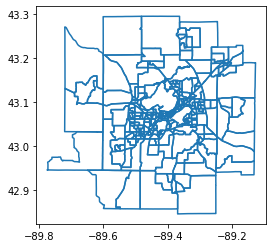

In [3]:
gdf_tracts = c.getCensusTracts()
gdf_tracts.boundary.plot()
plt.show()

In [4]:
demographic_data = c.getDemographicsData(gdf_tracts, demographics=['Race', 'Vehicles'], sample=True)
demographic_data.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>


,STATE,COUNTY,TRACT,BLKGRP,geometry,NAME,B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B25044_001E,Tot Pop,% White alone,% Black or African American alone,% American Indian and Alaska Native alone,% Asian alone alone,% Native Hawaiian and Other Pacific Islander alone,cars per capita
0,55,025,012900,2,"POLYGON ((-89.71995 43.26540, -89.71995 43.261...","Block Group 2, Census Tract 129, Dane County, ...",1844,1831,0,3,0,0,745,1844,0.992950,0.000000,0.001627,0.000000,0.0,0.404013
1,55,025,010800,2,"POLYGON ((-89.56397 42.99890, -89.56484 42.997...","Block Group 2, Census Tract 108, Dane County, ...",1802,1247,264,0,149,0,566,1802,0.692009,0.146504,0.000000,0.082686,0.0,0.314095
2,55,025,010903,1,"POLYGON ((-89.57806 43.03107, -89.57799 43.030...","Block Group 1, Census Tract 109.03, Dane Count...",3575,3096,0,61,334,0,1572,3575,0.866014,0.000000,0.017063,0.093427,0.0,0.439720


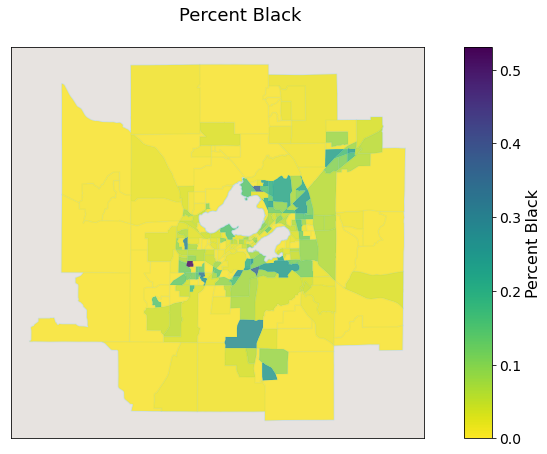

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad = -.5)

demographic_data.plot(column='% Black or African American alone', ax=ax, legend=True, cax=cax, cmap='viridis_r', alpha=.8, zorder=1)
fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=14)

gdf_tracts.boundary.plot(color='lightblue', alpha=.5, ax=ax, zorder=0)

cax.set_ylabel("Percent Black", fontsize=16)        
        
ax.set_facecolor("#e7e3e0")
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle("Percent Black", fontsize=18, x=.55, y=.83)
plt.show()

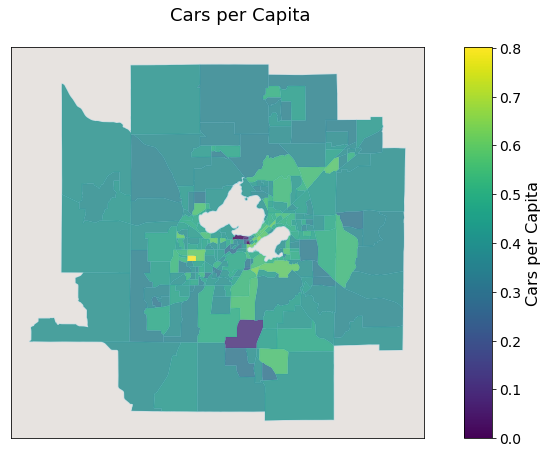

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad = -.5)

demographic_data.plot(column='cars per capita', ax=ax, legend=True, cax=cax, cmap='viridis', alpha=.8, zorder=1)
fig = ax.figure
cb_ax = fig.axes[1]
cb_ax.tick_params(labelsize=14)

gdf_tracts.boundary.plot(color='lightblue', alpha=.5, ax=ax, zorder=0)

cax.set_ylabel("Cars per Capita", fontsize=16)        
        
ax.set_facecolor("#e7e3e0")
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle("Cars per Capita", fontsize=18, x=.55, y=.83)
plt.show()